ML Task-1 To find out outliers

In [46]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("C:/Users/razil/Downloads/house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [20]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


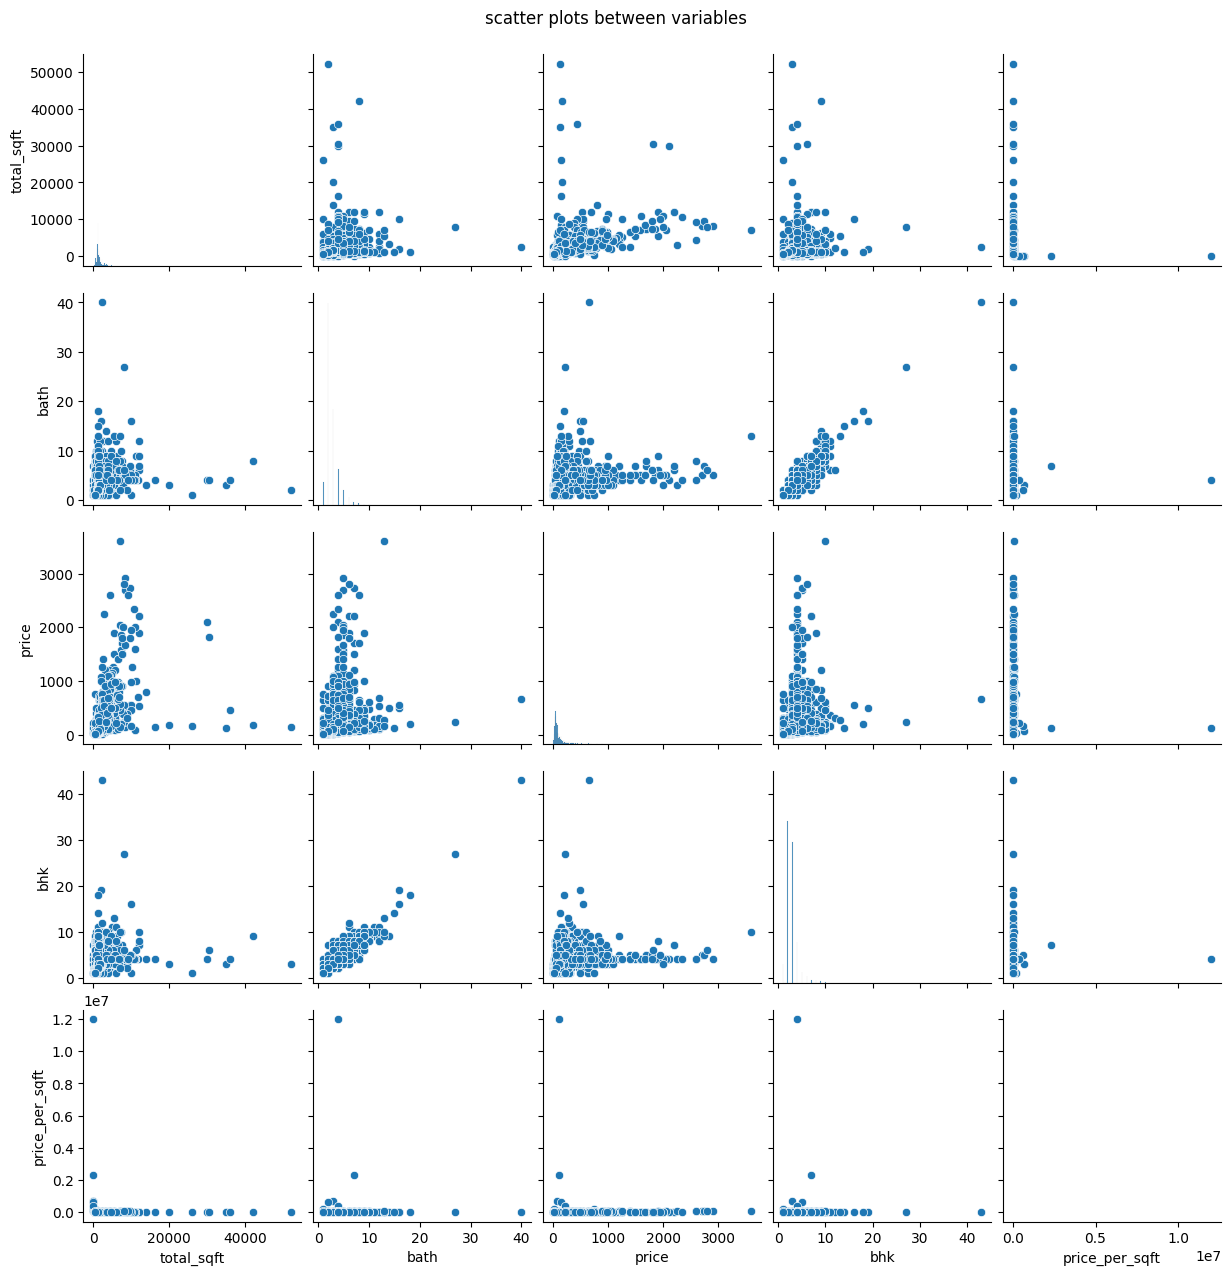

In [21]:
# Scatter plots to check correlations between variables
# Create a pair plot for all numerical columns
sns.pairplot(df)
plt.suptitle('scatter plots between variables',y=1.02)
plt.show()

Detecting the outliers and remove it using:1.
 Mean Function

In [23]:
mean=df.price_per_sqft.mean()
mean

7920.336742424242

In [27]:
std=df['price_per_sqft'].std()
std

106727.16032810867

In [28]:
data_mean = df[(df['price_per_sqft'] > mean - 2 * std) & (df['price_per_sqft'] < mean + 2 * std)]
data_mean

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


2. Percentile

In [24]:
#define lower and upper percentile
lower_percentile=0.05
upper_percentile=0.95
#calculating the limits corresponding to these percentiles
lower_limit = df['price_per_sqft'].quantile(0.01)
upper_limit = df['price_per_sqft'].quantile(0.99)
print("The upper limit is ",upper_limit," and the lower limit is ",lower_limit)

The upper limit is  23674.45000000001  and the lower limit is  2549.0


In [26]:
#removing outliers
df_new=df[(df['price_per_sqft']>=lower_limit)&(df['price_per_sqft']<=upper_limit)]
print("original dataset includes ",len(df)," values")
print("dataset after removing outliers includes ",len(df_new)," values")

original dataset includes  13200  values
dataset after removing outliers includes  12941  values


In [29]:
df_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


3. IQR method

In [30]:
Q1=df['price_per_sqft'].quantile(0.25)
Q1

4267.0

In [31]:
Q3=df['price_per_sqft'].quantile(0.75)
Q3

7317.0

In [32]:
IQR=Q3-Q1
IQR

3050.0

In [33]:
minimum= Q1 - 1.5 * IQR
print(minimum)
maximum = Q3+1.5*IQR
print(maximum)

-308.0
11892.0


In [34]:
data_iqr_removed = df[(df['price_per_sqft']>minimum) & (df['price_per_sqft']<maximum)]
data_iqr_removed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


4. Normal distribution 

In [35]:
data_normal_distribution = df[np.abs(df['price_per_sqft'] - df['price_per_sqft'].mean()) <= (3 * df['price_per_sqft'].std())]
data_normal_distribution

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


5. Z-score method

In [37]:
upper_limit = df['price_per_sqft'].mean()+3*df['price_per_sqft'].std()
lower_limit = df['price_per_sqft'].mean()-3*df['price_per_sqft'].std()
print("Upper limit is",upper_limit, "and the Lower limit is",lower_limit)

Upper limit is 328101.8177267502 and the Lower limit is -312261.14424190175


In [38]:
df.loc[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [39]:
new_df = df.loc[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

In [40]:
outliers2 = df.loc[(df['price_per_sqft'] < lower_limit) | (df['price_per_sqft'] > upper_limit)]

# Printing the outliers
print(outliers2)

             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333


BOX PLOT FOR NUMERICAL COLUMNS

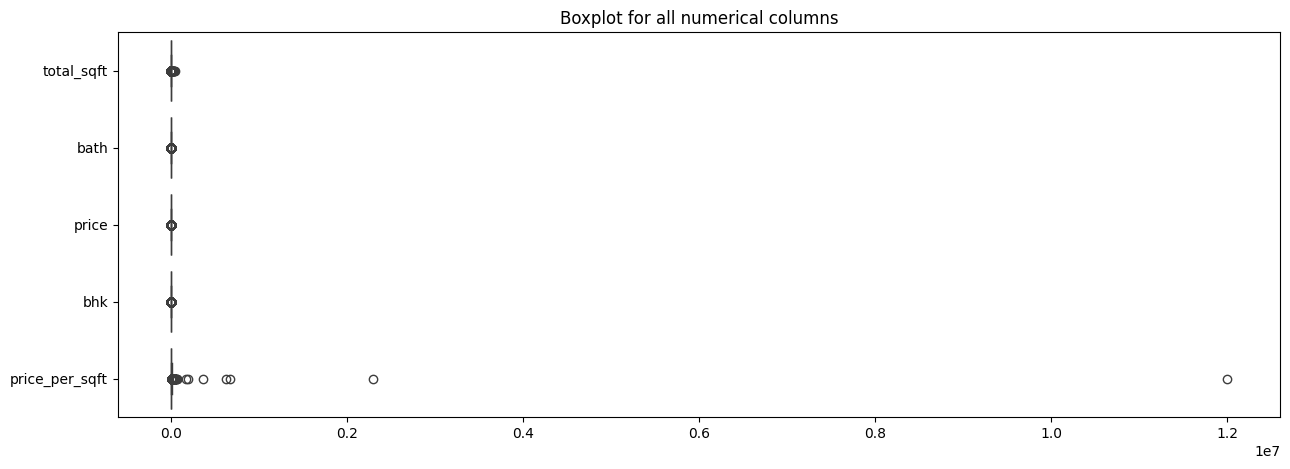

In [41]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot for all numerical columns')
plt.show()

HISTOGRAM TO CHECK NORMALITY OF PRICE_PER_SQFT

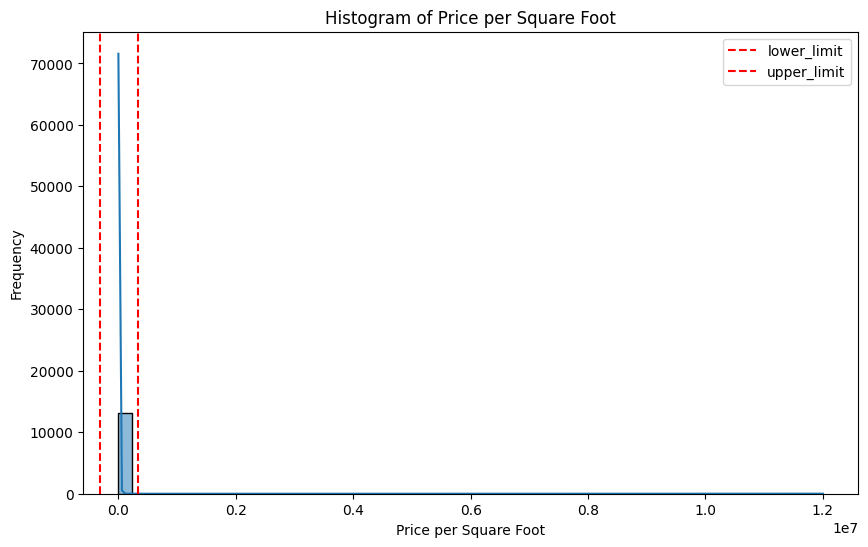

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], bins=50, kde=True)
plt.axvline(lower_limit, color='r', linestyle='--', label='lower_limit')
plt.axvline(upper_limit, color='r', linestyle='--', label='upper_limit')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Square Foot')
plt.legend()
plt.show()

HEATMAP TO CHECK CORRELATION

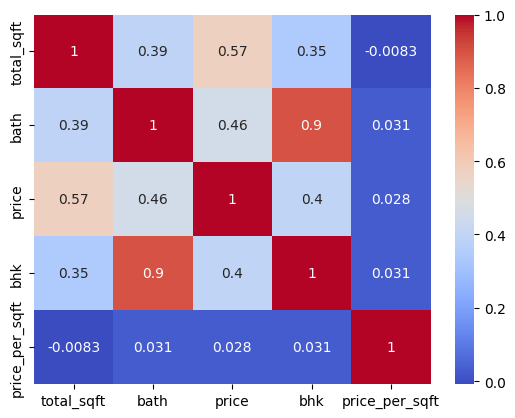

In [49]:
data_num = df.select_dtypes(include=[np.number])
corr = data_num.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

Check the correlation between all the numerical columns and plot heatmap.

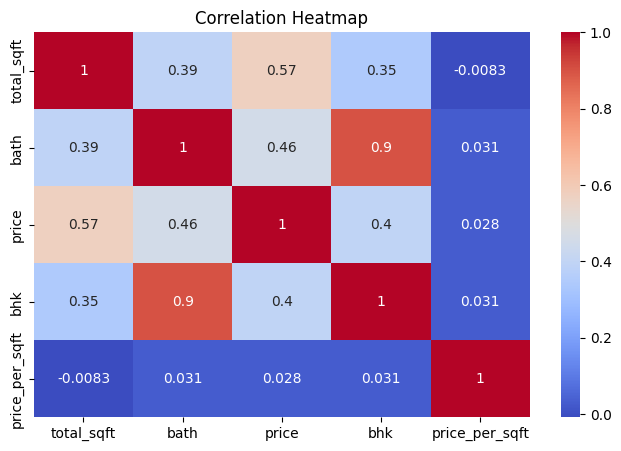

In [50]:
data_num = df.select_dtypes(include=[np.number])
correlation_matrix = data_num.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()